### Visualize toy dataset
The goal of the toy dataset is to make experiment with small vocabulary size.

It would be nice if we could generate data that looks like real text **from afar**.

For example we could try to make it zipfian (the log frequency of the tokens is linear with regards to the log rank of the tokens).

Maybe we can also take a look at the variance in the positions of the words, i.e. we would like some words to be able to appear pretty much everywhere in the sentence whereas others should appear in the beginning.

We can do quick experiments without worrying too much about this but eventually but it would be nice to be able to trust this model for more complex experiments, hyper parameters search, ...

One possibility is to learn a model on real data and learn the distribution of the features and learned params.

In [16]:
import numpy as np

from dictlearn.generate_synthetic_data import LogLinearModel

V = 100
embedding_size = 3
markov_order = 6
temperature=1.0
sentence_size = 20

model = LogLinearModel(V, embedding_size, markov_order, temperature)
n_sentences=2000
sentences = [model.sample(np.random.choice(sentence_size)) for i in range(1, n_sentences)] 

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

# count tokens and their positions
positions = np.zeros((V,sentence_size))
unigram_counts = [0 for i in range(0, V)]
for s in sentences:
    for i,w in enumerate(s):
        unigram_counts[w] += 1
        positions[w, i] += 1
ordered_count = sorted(unigram_counts, reverse=True)
total_word_count = sum(ordered_count)
# compute empirical frequency
ordered_freq = [float(oc)/total_word_count for oc in ordered_count] 

# TODO: compute variance using positions

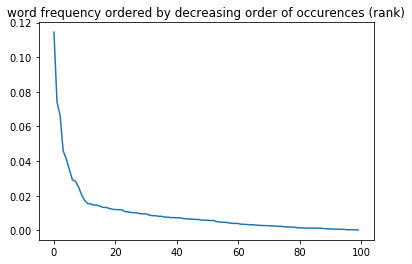

/part/01/Tmp/lisa/os_v5/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log


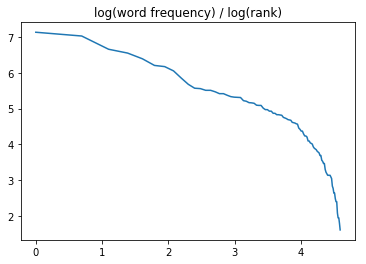

In [19]:
#print ordered_count

plt.plot(range(0, V), ordered_freq)
plt.title("word frequency ordered by decreasing order of occurences (rank)")
plt.show()

plt.plot(np.log(range(0, V)), np.log(ordered_count))
plt.title("log(word frequency) / log(rank)")
plt.show()

Not really zipfian so far.